In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#Linear Interpolation
x0,y0=1,10
x1,y1,=8,2

def P(x):
    P=y0+(y1-y0)*(x-x0)/(x1-x0)
    return P

print(P(3.5))

7.142857142857142


In [7]:
#Linear Interpolation
x0,x1=1.1,1.2
y0,y1,=1.9648,2.5722

def P(x):
    P=y0+(y1-y0)*(x-x0)/(x1-x0)
    return P

print(P(1.15))

2.2684999999999995


In [18]:
#polynomial Interpolation
x=[1, 1.1, 1.2, 1.3]
y=[1.5574, 1.9648, 2.5722, 3.6021]
for n in range(0,4):
    p=np.polyfit(x,y,n) #n차 다항식에서의 계수(오름차순)
    print(p)

[2.424125]
[ 6.7415 -5.3286]
[ 15.5625   -29.05225   15.058275]
[  37.08333333 -112.375       117.31566667  -40.4666    ]


In [22]:
poly=np.poly1d(p)
print(poly(1.15))

2.229593749999985


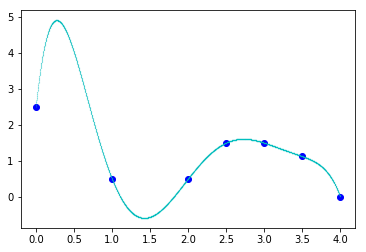

In [44]:
#polynomial Interpolation
x=[0,1,2,2.5,3,3.5,4]
y=[2.5,0.5,0.5,1.5,1.5,1.125,0]
plt.plot(x,y,'bo')

p=np.polyfit(x,y,6)
poly=np.poly1d(p)
i=np.arange(0,4,0.001)
z=poly(i)
plt.plot(i,z,'co',ms=0.1)

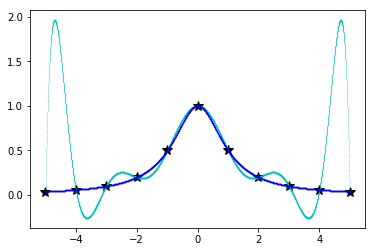

In [48]:
#Runge Phenomenon
x=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
y=[1/26,1/17,1/10,1/5,1/2,1,1/2,1/5,1/10,1/17,1/26]
plt.plot(x,y,'k*',ms=10)

p=np.polyfit(x,y,10)
poly=np.poly1d(p)
i=np.arange(-5,5,0.001)
z=poly(i)
w=1/(1+i**2)
plt.plot(i,z,'co',ms=0.1)
plt.plot(i,w,'bo',ms=0.1)

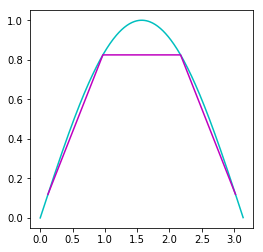

In [84]:
#Chebyshev Polynomial
a=0
b=np.pi
n=3

j=np.arange(0,n+1)
t=np.cos((2*j+1)*np.pi/(2*n+2))
x=(1/2)*(a+b+(b-a)*t)
y=np.sin(x)

i=np.arange(a,b,0.01)


fig=plt.figure(1,figsize=(4,4))
plt.plot(i,np.sin(i),'c')

p=np.polyfit(x,y,n)
poly=np.poly1d(p)
y1=poly(x)

plt.plot(x,y1,'m')




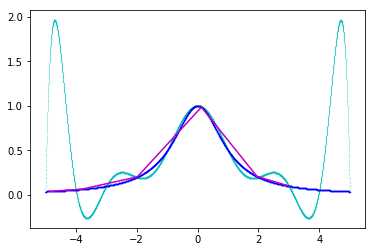

In [87]:
#revisited
x=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
y=[1/26,1/17,1/10,1/5,1/2,1,1/2,1/5,1/10,1/17,1/26]


p=np.polyfit(x,y,10)
poly=np.poly1d(p)
i=np.arange(-5,5,0.001)
z=poly(i)
w=1/(1+i**2)
plt.plot(i,z,'co',ms=0.1)
plt.plot(i,w,'bo',ms=0.1)

a=-5
b=np.pi
n=5

j=np.arange(0,n+1)
t=np.cos((2*j+1)*np.pi/(2*n+2))
x=(1/2)*(a+b+(b-a)*t)
y=1/(1+x**2)
p=np.polyfit(x,y,n)
poly=np.poly1d(p)
y1=poly(x)

plt.plot(x,y1,'m')

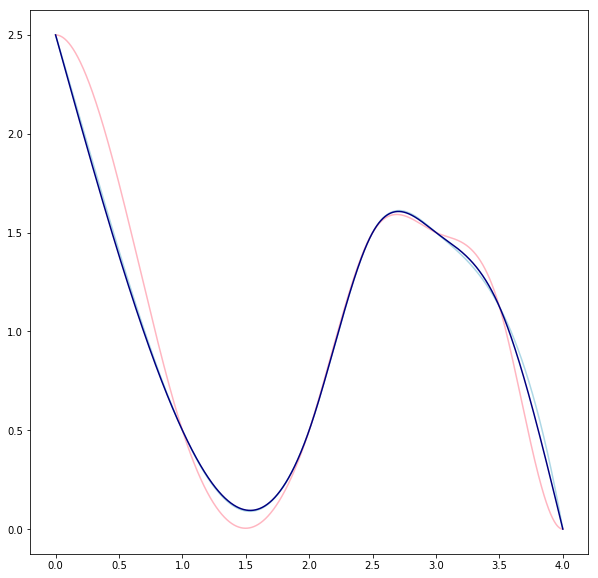

In [22]:
#Cubic Spline Function
x=np.array([0,1,2,2.5,3,3.5,4])
y=np.array([2.5,0.5,0.5,1.5,1.5,1.125,0])
fig=plt.figure(1,figsize=(10,10))
from scipy import interpolate
result=interpolate.CubicSpline(x,y,bc_type='not-a-knot')
xs=np.linspace(0,4,num=4000)
plt.plot(xs,result(xs),'lightblue')

from scipy import interpolate
result=interpolate.CubicSpline(x,y,bc_type='clamped')
xs=np.linspace(0,4,num=4000)
plt.plot(xs,result(xs),'lightpink')

from scipy import interpolate
result=interpolate.CubicSpline(x,y,bc_type='natural')
xs=np.linspace(0,4,num=4000)
plt.plot(xs,result(xs),'navy')

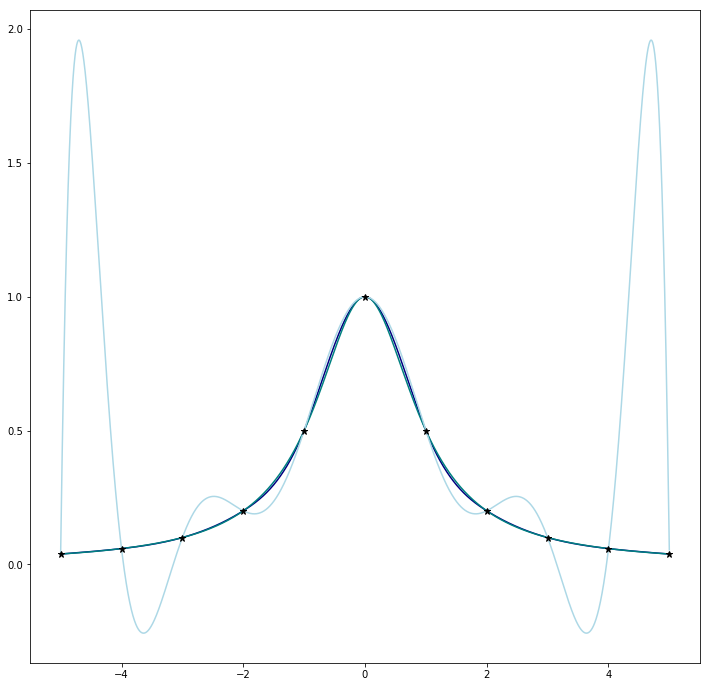

In [32]:
x=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
y=[1/26,1/17,1/10,1/5,1/2,1,1/2,1/5,1/10,1/17,1/26]

fig=plt.figure(1,figsize=(12,12))

from scipy import interpolate
result=interpolate.CubicSpline(x,y,bc_type='natural')
xs=np.linspace(-5,5,num=10000)

plt.plot(xs,result(xs),'navy')

plt.plot(xs,1/(1+xs**2),'teal')

p=np.polyfit(x,y,10)
poly=np.poly1d(p)
i=np.arange(-5,5,0.001)
z=poly(i)

plt.plot(i,z,'lightblue',)
plt.plot(x,y,'k*',ms=7)

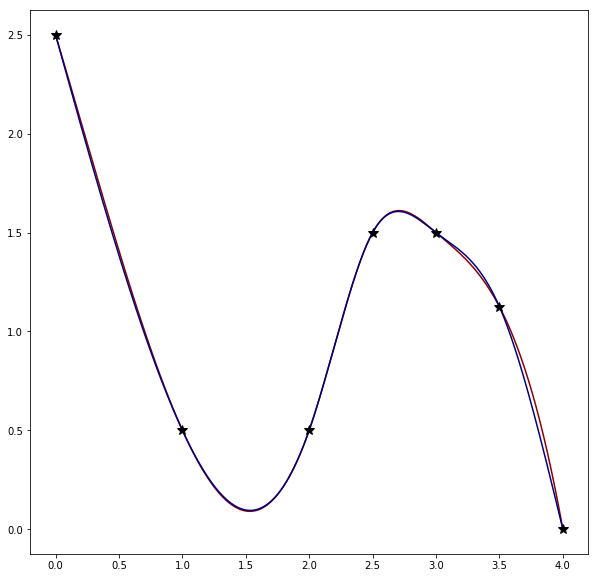

In [43]:
#B Spline
from scipy import interpolate

x=np.array([0,1,2,2.5,3,3.5,4])
y=np.array([2.5,0.5,0.5,1.5,1.5,1.125,0])
fig=plt.figure(1,figsize=(10,10))

xnew=np.linspace(0,4,num=4000)
tck=interpolate.splrep(x,y,s=0)
ynew=interpolate.splev(xnew,tck,der=0)
plt.plot(xnew,ynew,'darkred')

result=interpolate.CubicSpline(x,y,bc_type='natural')
xs=np.linspace(0,4,num=4000)
plt.plot(xs,result(xs),'navy')

plt.plot(x,y,'k*',ms=10)

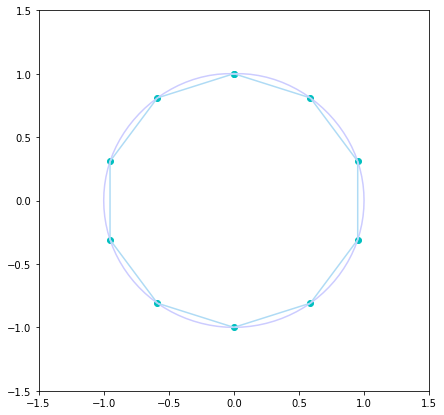

In [53]:
t = np.arange(0,1.1,0.1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck,u = interpolate.splprep([x,y],s=0) 
tnew = np.arange(0,1.01,0.01)
out = interpolate.splev(tnew,tck) 
fig=plt.figure(1,figsize=(7,7))
plt.plot(x,y,'co') 
plt.plot(out[0],out[1],'#CCCCFF') 
plt.plot(x,y,'#AFDBF5') 
plt.xlim(-1.5,1.5) 
plt.ylim(-1.5,1.5)
plt.show()

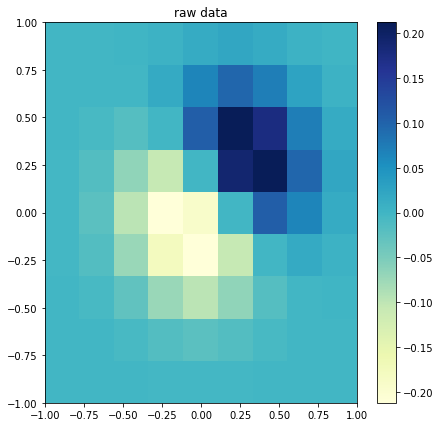

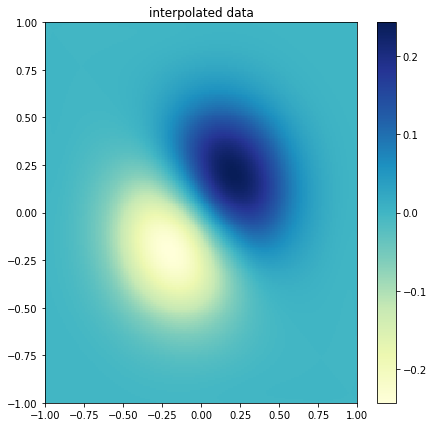

In [65]:
x,y = np.mgrid[-1:1:10j,-1:1:10j] 
x=np.linspace(-1,1,10) 
y=np.linspace(-1,1,10) 
xx,yy=np.meshgrid(x,y)
z = (xx+yy)*np.exp(-6.0*(xx*xx+yy*yy))
fig=plt.figure(1,figsize=(7,7))
plt.pcolor(xx,yy,z,cmap='YlGnBu')
plt.colorbar()
plt.title('raw data')
plt.show()

xnew=np.linspace(-1,1,200)
ynew=np.linspace(-1,1,200)
f = interpolate.interp2d(x,y,z,kind='cubic') 
znew = f(xnew,ynew)
fig=plt.figure(1,figsize=(7,7))
plt.pcolor(xnew,ynew,znew,cmap='YlGnBu') 
plt.colorbar() 
plt.title("interpolated data") 
plt.show()